# Realized Volatility

FX Pricing needs volatility calculation. GARCH or realized vol or suitable method is used based on analysis of data
GARCH methods are suitable if there is autocorrelation in data otherwise realized vol is used

## Inputs

In [1]:
from math import sqrt

basis_point = 0.0001
num_secs_in_a_year = 252 * 24 * 60 * 60
sqrt_num_secs_in_a_year = sqrt(num_secs_in_a_year)
num_samples = 60
min_basis_point_spread = 4
max_basis_point_spread = 8
vol_floor = 0.01

## Spreads

In Real time, spread is calculated as :  log(currentPrice)-log(lastPrice)

Also component publishes "realized vol" only after num_samples reaches desired value

Let's consider realized vol of last 60 observations

$s_n = log(p_n) - log(p_{n-1})$


$sumOfSquares = \Sigma_{n-60}^{n} S_n$


$rv = \sqrt{\frac{sumOfSquares}{60}} *  \sqrt{sqrt\_num\_secs\_in\_a\_year} $


In [45]:
import random

nrand = 10000
random_spreads = [basis_point * (min_basis_point_spread + (max_basis_point_spread - min_basis_point_spread) * random.uniform(0, 1)) for i in range(nrand)]
sq_random_spreads = [x**2 for x in random_spreads]
w=num_samples-1
sum_sq_rand_spreads_60 = [sum(sq_random_spreads[i:w+i]) for i in range(nrand - num_samples)]
realized_vol = [max(sqrt(abs(x)/num_samples) * sqrt_num_secs_in_a_year, vol_floor) for x in sum_sq_rand_spreads_60]

sma_window=30
w=sma_window-1
sma = [sum(realized_vol[i:w+i])/sma_window for i in range( nrand - sma_window)]

print(len(realized_vol))
print(len(sma))
print(realized_vol[0:30])
print(realized_vol[9910:9940])
print(sma[0:30])
print(sma[9910:9940])

9940
9970
[2.7120973102073953, 2.7127048747734217, 2.7147027681367333, 2.694333722790199, 2.707598215859046, 2.721266001005455, 2.704753195616382, 2.7067819233629153, 2.704102181170678, 2.689567244655987, 2.6967851091887893, 2.687665996590112, 2.688484790368645, 2.675563019588505, 2.650828922860471, 2.6327662933573386, 2.6158340641695346, 2.608327535769273, 2.597102497277995, 2.599261428071275, 2.622027503563943, 2.616635521220139, 2.631310658839667, 2.6378760701689976, 2.638158661212482, 2.6311004657564196, 2.6364996935177, 2.6334181896982725, 2.6335008885467337, 2.6383395098996063]
[2.8205390865260562, 2.8228545954667967, 2.802673525915892, 2.81133381201809, 2.812602126302103, 2.8373833260813095, 2.842683950232256, 2.853887057130462, 2.870135523326763, 2.897885468844129, 2.8839029689808364, 2.8742716646527104, 2.871872752598557, 2.889184165873698, 2.871693745459833, 2.8636871153616017, 2.8649138433888655, 2.8531510175853874, 2.857770717780201, 2.8440839463482552, 2.830693580305545, 2

## Plot realized vol

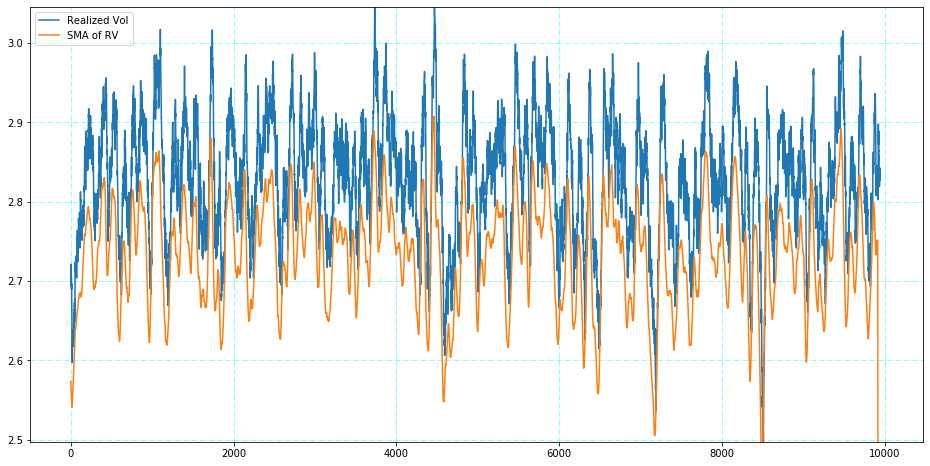

In [50]:
%matplotlib inline

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16,8]
#plt.grid(b=True, color='r')
plt.grid(b=True, color='aqua', alpha=0.6, linestyle='dashdot')
axes = plt.gca()
axes.set_ylim([min(realized_vol),max(realized_vol)])
h1, = plt.plot(realized_vol, label='Realized Vol')
h2, = plt.plot(sma, label='SMA of RV')
plt.legend(handles=[h1, h2], loc='best')
plt.show()